MLP (Raw 5x5):
  MSE: 10148.075976972976
  R² : 0.6502840908058553


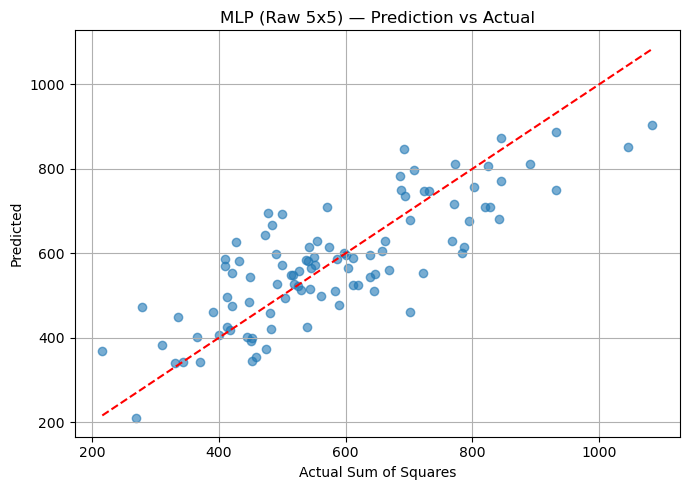

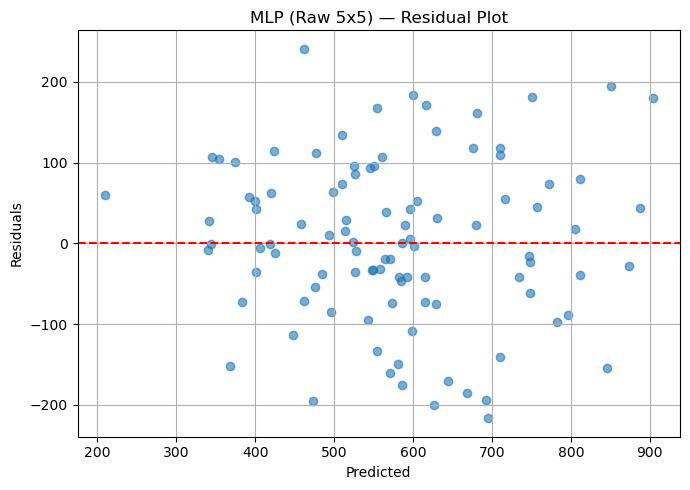

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train_5x5_eigen_data.csv")
test_df = pd.read_csv("test_5x5_eigen_data.csv")

feature_cols = list("abcdefghijklmnopqrstuvwxy")
X_train = train_df[feature_cols]
y_train = train_df["sum_squared"]
X_test = test_df[feature_cols]
y_true = test_df["sum_squared"]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("MLP (Raw 5x5):")
print("  MSE:", mean_squared_error(y_true, y_pred))
print("  R² :", r2_score(y_true, y_pred))

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("MLP (Raw 5x5) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("MLP (Raw 5x5) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


MLP (Featured 5x5):
  MSE: 6770.279199570552
  R² : 0.7666873650583108


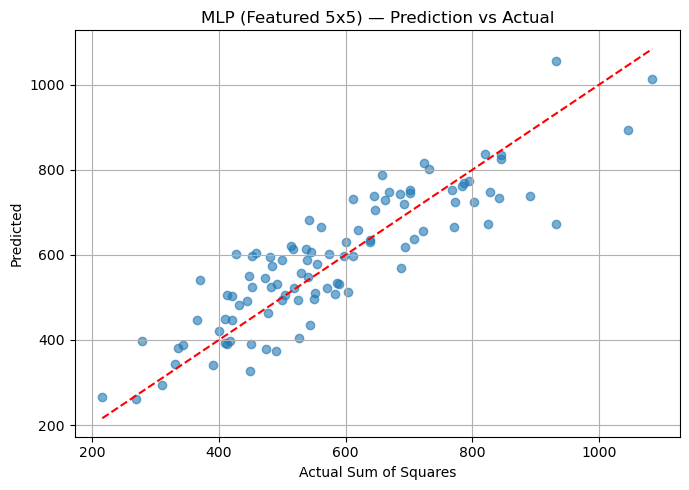

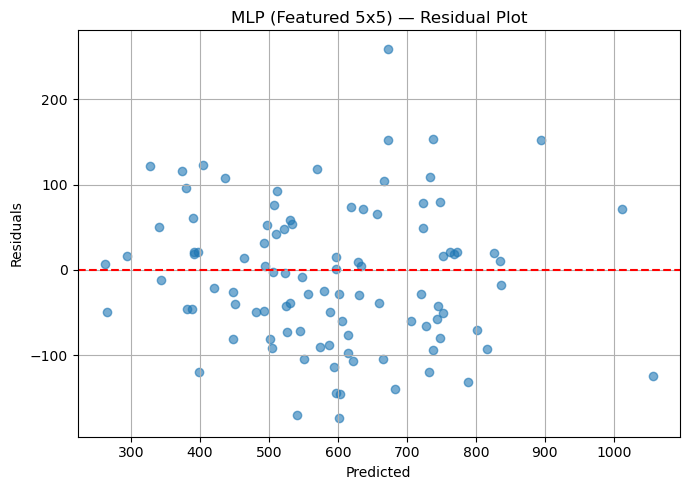

In [6]:
def add_features(df):
    df['trace'] = df['a'] + df['g'] + df['m'] + df['s'] + df['y']  # Diagonal elements

    def symmetry_score(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        score = 0
        for i in range(5):
            for j in range(i + 1, 5):
                score += abs(mat[i][j] - mat[j][i])
        return score

    def det_5x5(row):
        mat = np.array([
            [row['a'], row['b'], row['c'], row['d'], row['e']],
            [row['f'], row['g'], row['h'], row['i'], row['j']],
            [row['k'], row['l'], row['m'], row['n'], row['o']],
            [row['p'], row['q'], row['r'], row['s'], row['t']],
            [row['u'], row['v'], row['w'], row['x'], row['y']]
        ])
        return np.linalg.det(mat)

    df['sym_score'] = df.apply(symmetry_score, axis=1)
    df['det'] = df.apply(det_5x5, axis=1)
    return df

train_df = add_features(pd.read_csv("train_5x5_eigen_data.csv"))
test_df = add_features(pd.read_csv("test_5x5_eigen_data.csv"))

feature_cols = list("abcdefghijklmnopqrstuvwxy") + ['trace', 'sym_score', 'det']
X_train = train_df[feature_cols]
y_train = train_df["sum_squared"]
X_test = test_df[feature_cols]
y_true = test_df["sum_squared"]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("MLP (Featured 5x5):")
print("  MSE:", mean_squared_error(y_true, y_pred))
print("  R² :", r2_score(y_true, y_pred))

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("MLP (Featured 5x5) — Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_true - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("MLP (Featured 5x5) — Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()
